# Plot how model-free behavior changes across age

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from toolz import partition_all
from scipy.signal import find_peaks
from aging.plotting import figure, legend, format_plots, COLORMAPS, PLOT_CONFIG, save_factory

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig2", tight_layout=False)

In [3]:
def zscore(ser):
    return (ser - ser.mean()) / ser.std()

## Males

In [4]:
df_path = '/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_syllable_df_v00.parquet'
df = pd.read_parquet(df_path)

### Compute model-free behavior

In [5]:
n = 6
out = {}
for (age, mouse, uuid), _df in tqdm(df.groupby(["age", "subject_name", "uuid"], sort=False, observed=True)):
    ### rearing ###
    height = _df["recon_height"].rolling(11, center=True).median()
    demeaned_height = height - height.quantile(0.1)
    thresh = demeaned_height.std() * 2
    mask = demeaned_height > thresh
    rear_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)

    ### running ###
    smooth_speed = _df["velocity_2d_mm"].rolling(23, center=True).median()
    demeaned_speed = smooth_speed - smooth_speed.quantile(0.1)
    dspeed = smooth_speed.diff(n) / n
    peaks, props = find_peaks(dspeed, height=dspeed.std() * 1.75, distance=15)

    speed_counts = len(peaks) / (len(_df) / 30)

    ### walking ###
    peaks, props = find_peaks(dspeed, height=(dspeed.std() * 0.75, dspeed.std() * 1.5), distance=15)
    walk_counts = len(peaks) / (len(mask) / 30)

    ### pausing ###
    neg_x = -smooth_speed
    neg_x = neg_x - neg_x.mean()
    peaks, props = find_peaks(neg_x, height=neg_x.std() * 0.35, distance=21)
    pause_counts = len(peaks) / (len(mask) / 30)

    ### scrunching ###
    width = _df["recon_width"].rolling(19, center=True).median()
    width = width - width.mean()
    dwidth = width.diff(n) / n
    peaks, props = find_peaks(dwidth, height=dwidth.std() * 1.3, distance=15)
    peaks = peaks[width.iloc[peaks] > (width.std() * 1.75)]
    scrunch_counts = len(peaks) / (len(mask) / 30)

    out[(age, mouse, uuid)] = {
        "rear_counts": rear_counts,
        "run_counts": speed_counts,
        "walk_counts": walk_counts,
        "pause_counts": pause_counts,
        "scrunch_counts": scrunch_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/363 [00:00<?, ?it/s]

In [6]:
out_df = pd.DataFrame(out).T
out_df.index.names = ('age', 'mouse', 'uuid')
out_df = out_df.reset_index()
out_df_male = out_df.copy()

In [7]:
yaxes = out_df.filter(regex=r".*_counts").columns

In [8]:
out_df = out_df.where(out_df['pause_counts'] > out_df['pause_counts'].quantile(0.025))

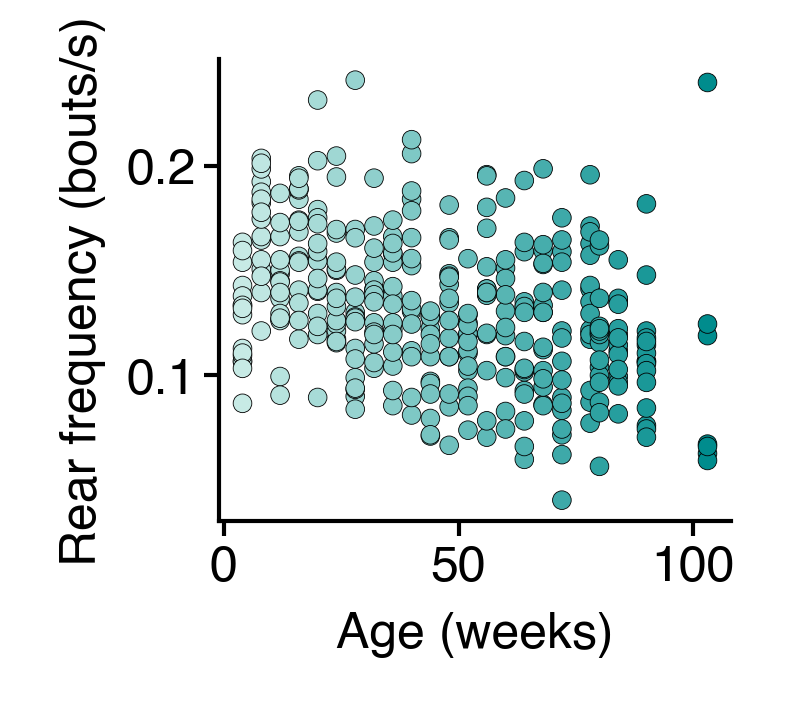

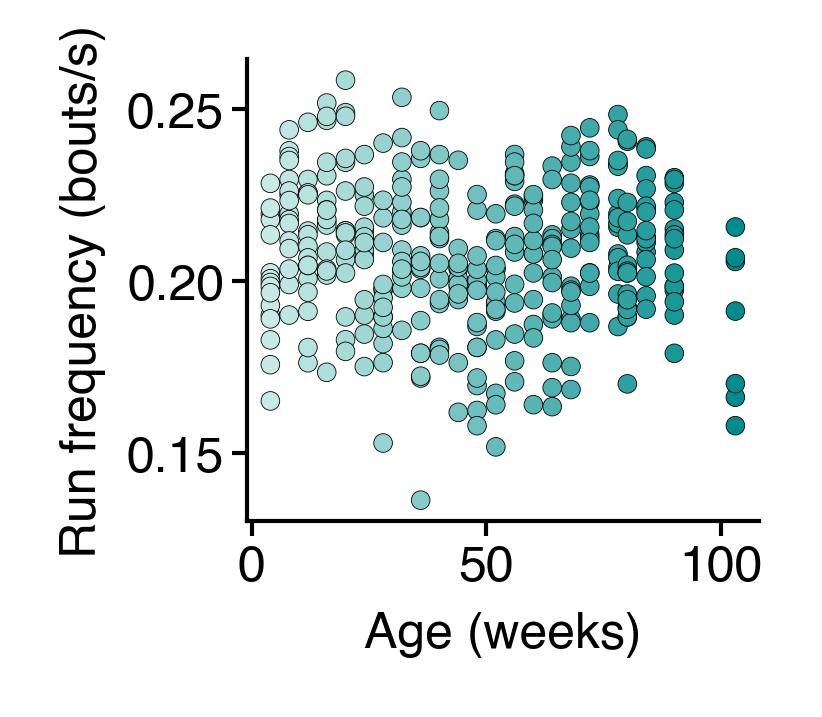

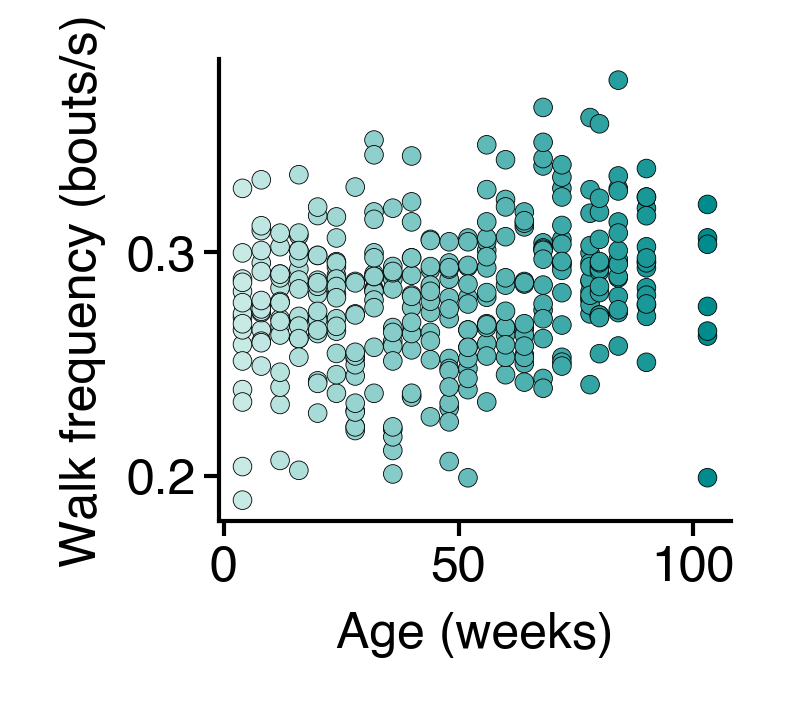

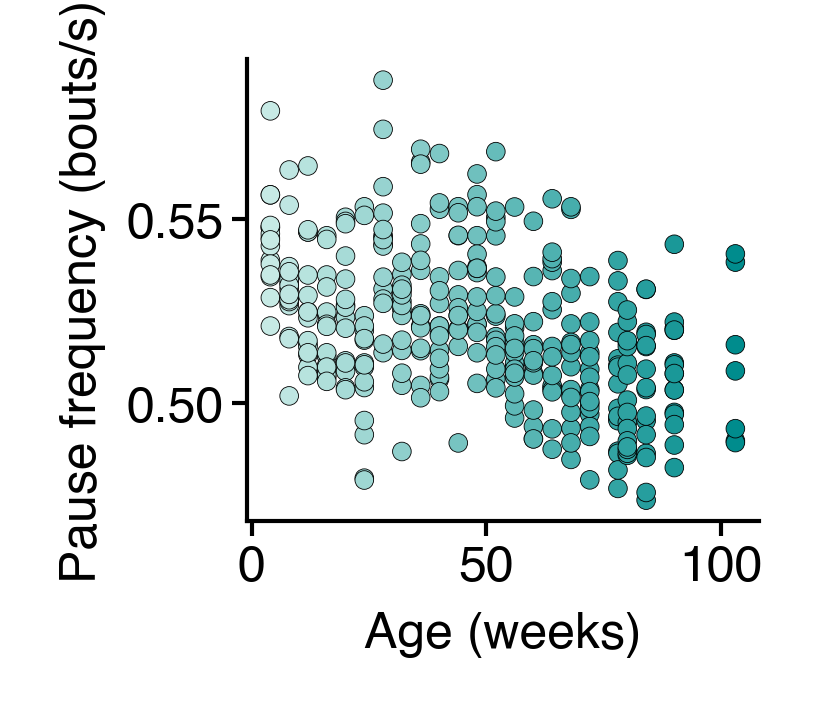

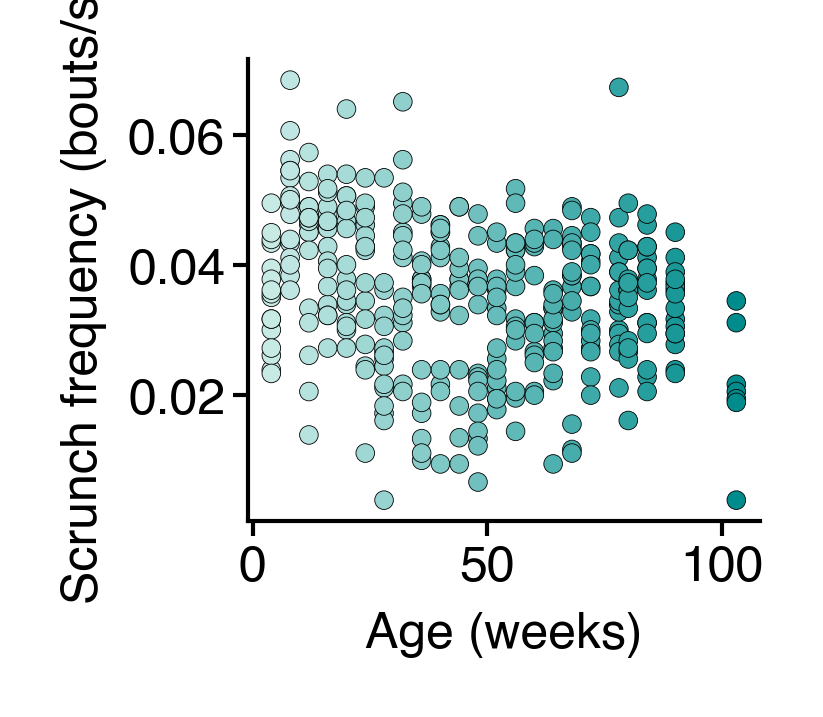

In [9]:
for beh in yaxes:
    beh_strip = beh.split('_')[0].capitalize()
    fig = figure(1.1, 1)
    ax = fig.gca()
    im = ax.scatter(
        out_df["age"],
        out_df[beh],
        c=out_df["age"],
        cmap=COLORMAPS.ont_male,
        s=5,
        edgecolor="k",
        linewidths=0.1,
    )
    ax.set(
        xlabel="Age (weeks)",
        ylabel=f"{beh_strip} frequency (bouts/s)",
        xticks=[0, 50, 100],
    )
    sns.despine()
    saver(fig, f"{beh_strip}_model-free-frequency-male");

In [10]:
avg = out_df.groupby('age')[yaxes].mean()
smooth_avg = avg.rolling(7, center=True, win_type='exponential', min_periods=1).mean(tau=1.)
avg = avg - avg.min()
avg = avg / avg.max()
smooth_avg = smooth_avg - smooth_avg.min()
smooth_avg = smooth_avg / smooth_avg.max()

avg.columns = [x.split('_')[0].capitalize() for x in avg.columns]
smooth_avg.columns = [x.split('_')[0].capitalize() for x in smooth_avg.columns]
smooth_avg_male = smooth_avg.copy()

<Axes: xlabel='age'>

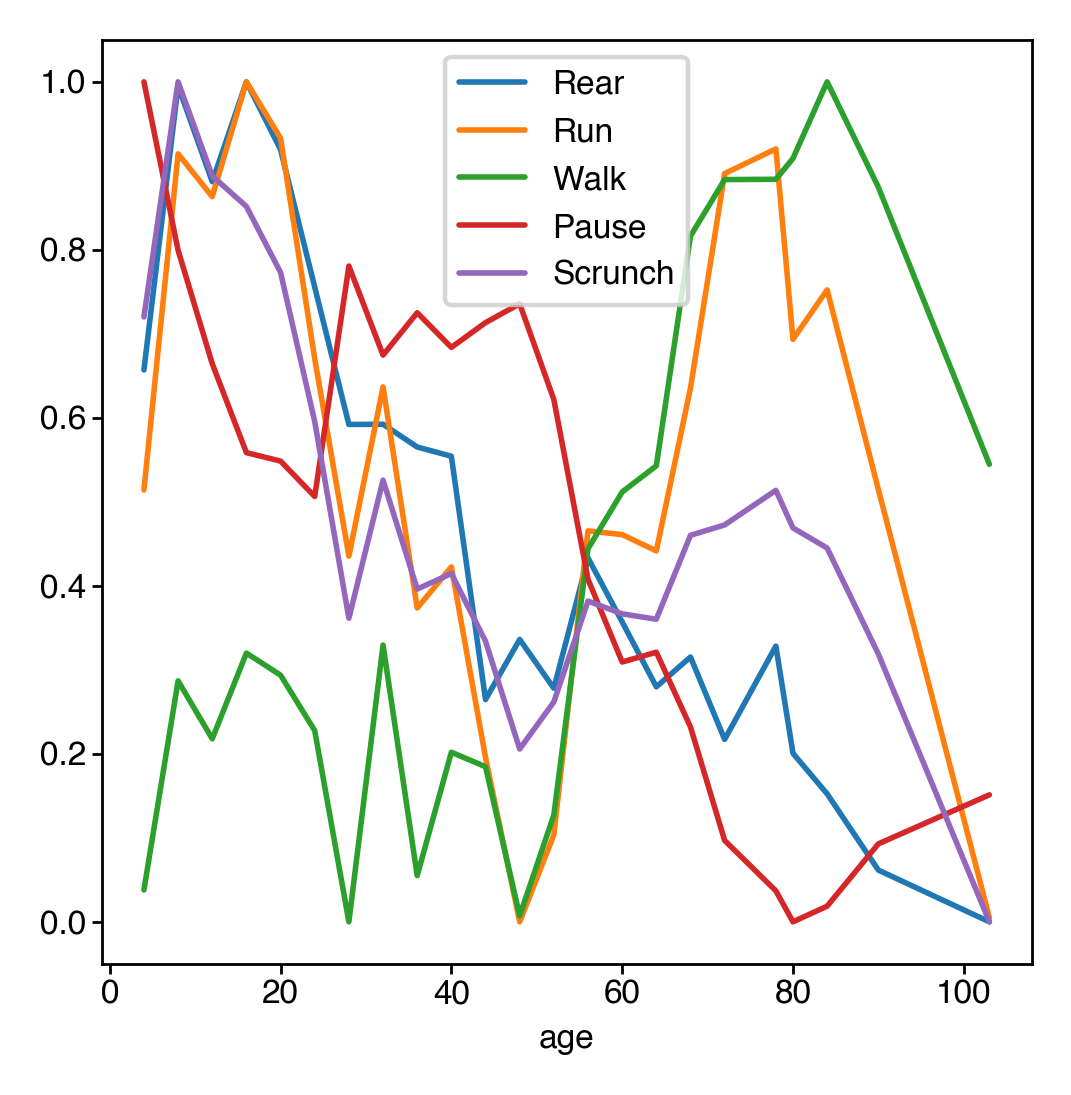

In [11]:
smooth_avg.plot()

In [12]:
ordering = avg.rolling(7, center=True, win_type='exponential', min_periods=1).mean(tau=1.5).idxmax().sort_values().index

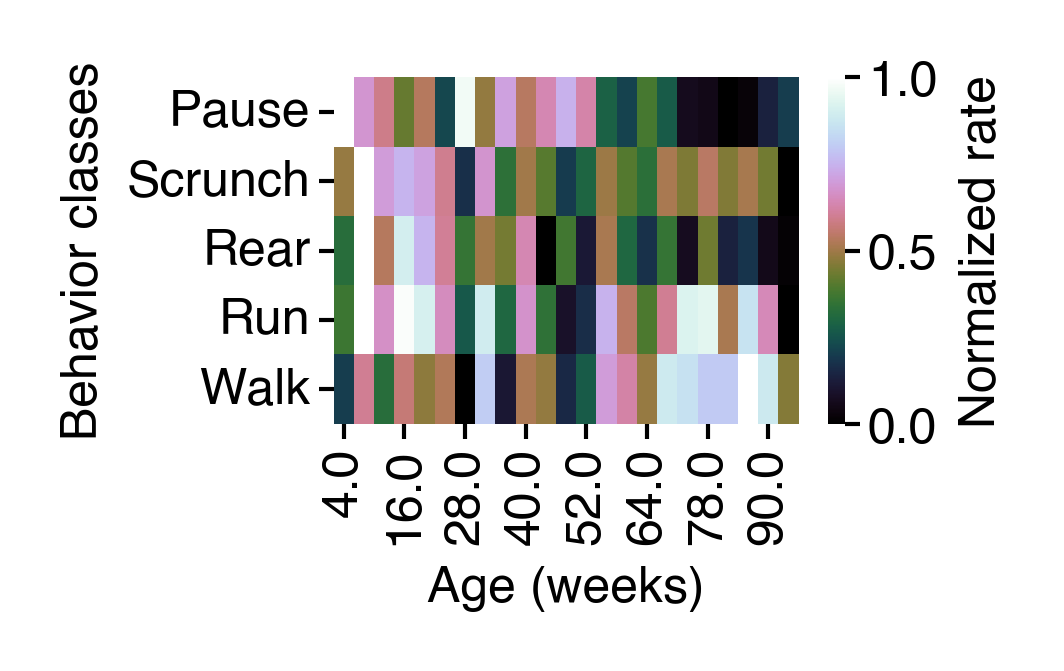

In [13]:
fig = figure(1.25, 0.75)
ax = sns.heatmap(avg[ordering].T, cmap='cubehelix', cbar_kws=dict(label="Normalized rate"))
ax.set(xlabel="Age (weeks)", ylabel="Behavior classes")
saver(fig, "model-free-behavior-rates-male");

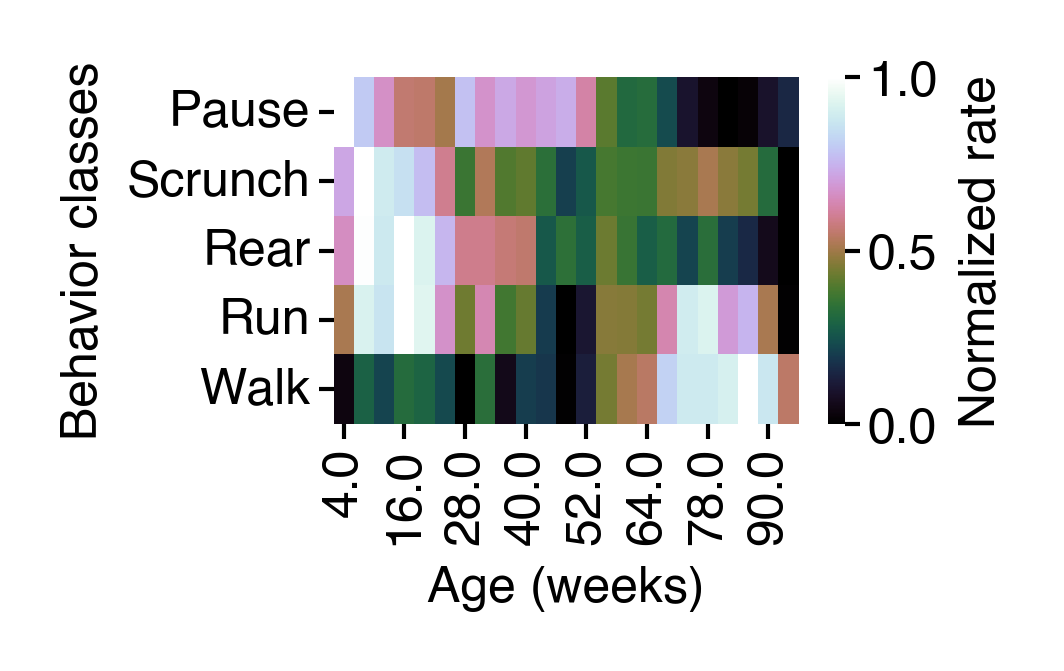

In [14]:
fig = figure(1.25, 0.75)
ax = sns.heatmap(smooth_avg[ordering].T, cmap='cubehelix', cbar_kws=dict(label="Normalized rate"))
ax.set(xlabel="Age (weeks)", ylabel="Behavior classes")
saver(fig, "smoothed-model-free-behavior-rates-male");

## Females

In [34]:
df_path = '/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_syllable_df_v01.parquet'
df = pd.read_parquet(df_path)

### Compute model-free behavior

In [35]:
n = 6
out = {}
for (age, mouse, uuid), _df in tqdm(df.groupby(["age", "subject_name", "uuid"], sort=False, observed=True)):
    ### rearing ###
    height = _df["recon_height"].rolling(11, center=True).median()
    demeaned_height = height - height.quantile(0.1)
    thresh = demeaned_height.std() * 2
    mask = demeaned_height > thresh
    rear_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)

    ### running ###
    smooth_speed = _df["velocity_2d_mm"].rolling(23, center=True).median()
    demeaned_speed = smooth_speed - smooth_speed.quantile(0.1)
    dspeed = smooth_speed.diff(n) / n
    peaks, props = find_peaks(dspeed, height=dspeed.std() * 1.75, distance=15)

    speed_counts = len(peaks) / (len(_df) / 30)

    ### walking ###
    peaks, props = find_peaks(dspeed, height=(dspeed.std() * 0.75, dspeed.std() * 1.5), distance=15)
    walk_counts = len(peaks) / (len(mask) / 30)

    ### pausing ###
    neg_x = -smooth_speed
    neg_x = neg_x - neg_x.mean()
    peaks, props = find_peaks(neg_x, height=neg_x.std() * 0.35, distance=21)
    pause_counts = len(peaks) / (len(mask) / 30)

    ### scrunching ###
    width = _df["recon_width"].rolling(19, center=True).median()
    width = width - width.mean()
    dwidth = width.diff(n) / n
    peaks, props = find_peaks(dwidth, height=dwidth.std() * 1.3, distance=15)
    peaks = peaks[width.iloc[peaks] > (width.std() * 1.75)]
    scrunch_counts = len(peaks) / (len(mask) / 30)

    out[(age, mouse, uuid)] = {
        "rear_counts": rear_counts,
        "run_counts": speed_counts,
        "walk_counts": walk_counts,
        "pause_counts": pause_counts,
        "scrunch_counts": scrunch_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/383 [00:00<?, ?it/s]

In [36]:
out_df = pd.DataFrame(out).T
out_df.index.names = ('age', 'mouse', 'uuid')
out_df = out_df.reset_index()
out_df_female = out_df.copy()

In [37]:
yaxes = out_df.filter(regex=r".*_counts").columns

In [38]:
# out_df = out_df.where(out_df['pause_counts'] > out_df['pause_counts'].quantile(0.025))
out_df = out_df.where((out_df['pause_counts'] < 0.6) & (out_df['pause_counts'] > 0.3))

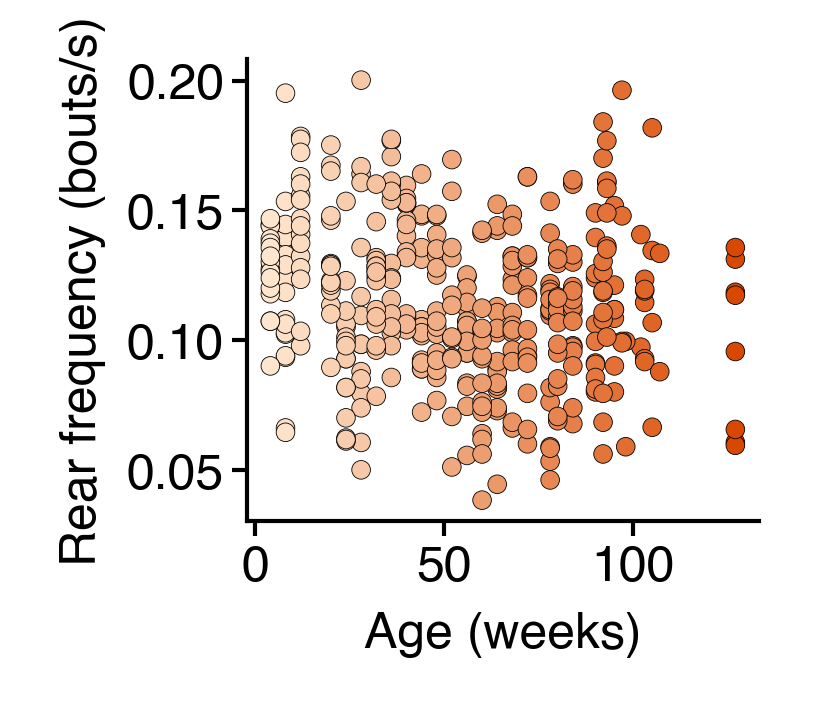

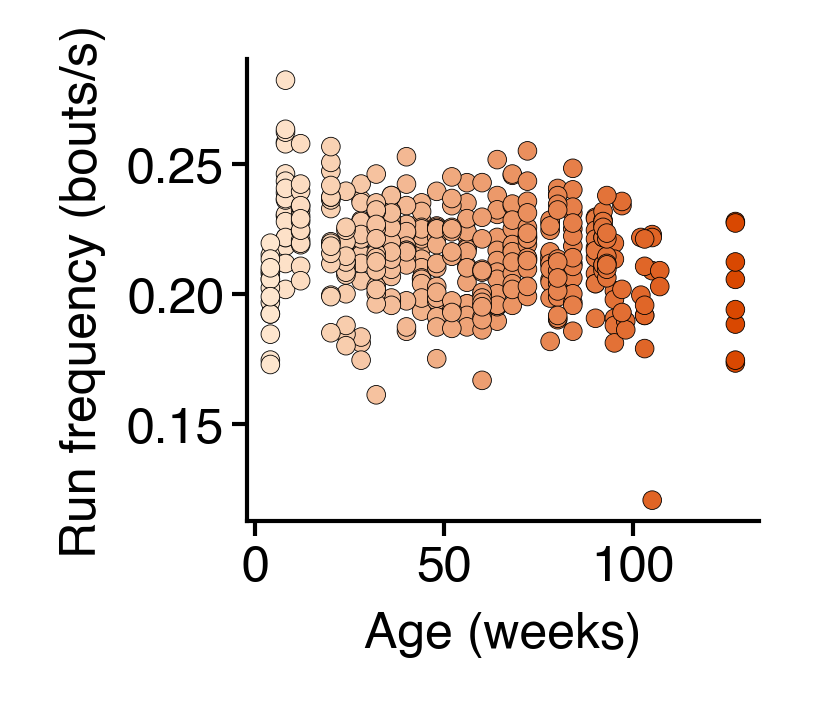

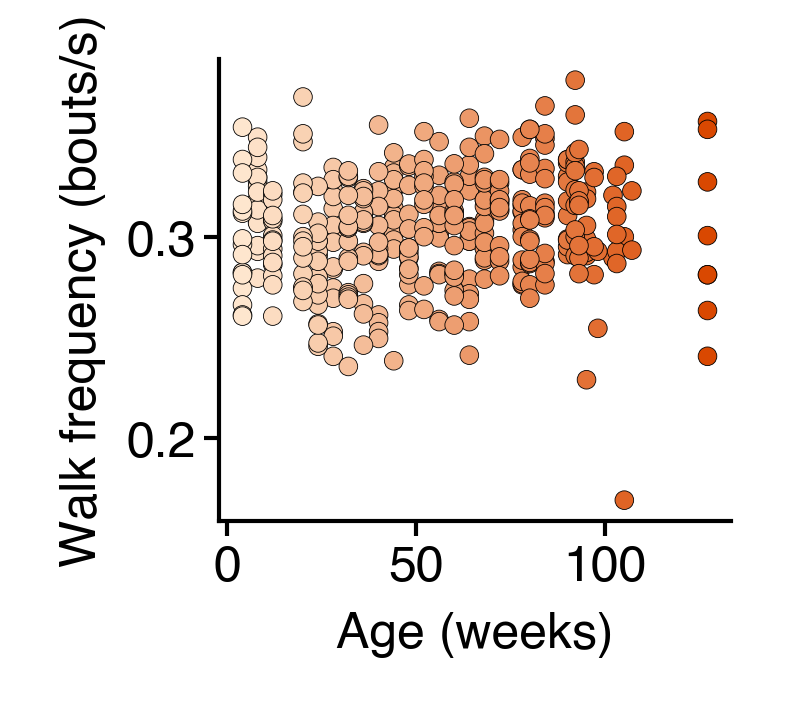

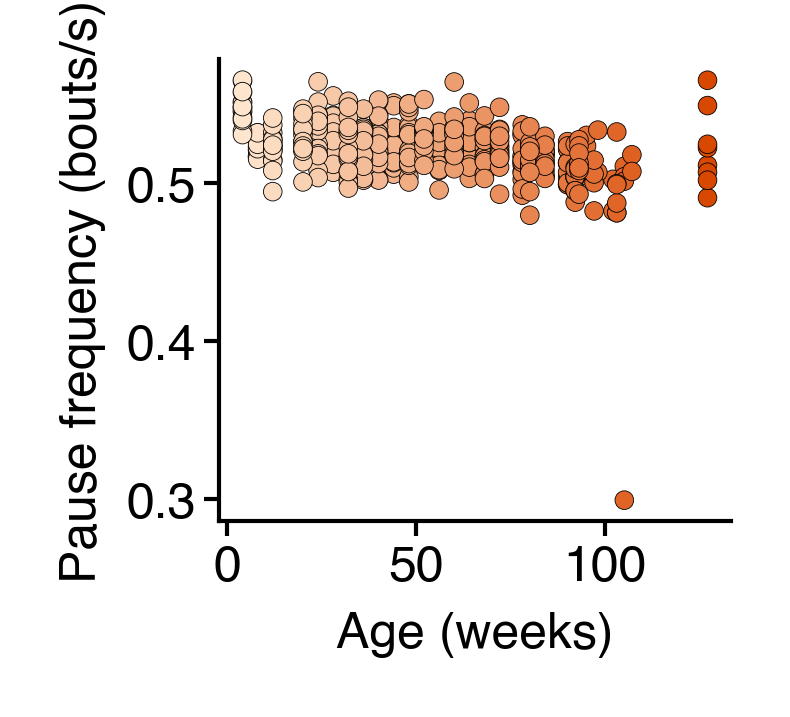

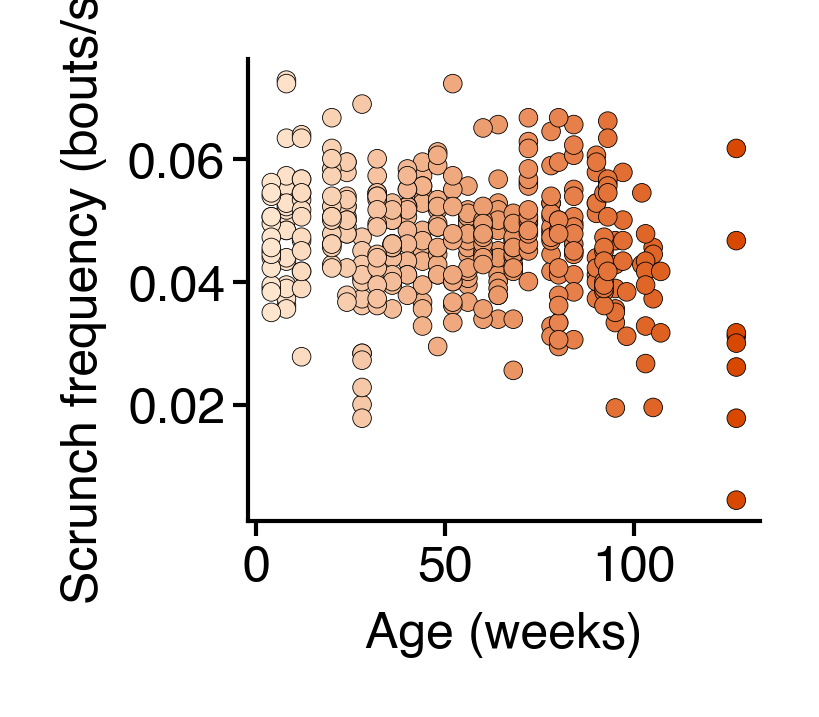

In [39]:
for beh in yaxes:
    beh_strip = beh.split('_')[0].capitalize()
    fig = figure(1.1, 1)
    ax = fig.gca()
    im = ax.scatter(
        out_df["age"],
        out_df[beh],
        c=out_df["age"],
        cmap=COLORMAPS.ont_female,
        s=5,
        edgecolor="k",
        linewidths=0.1,
    )
    ax.set(
        xlabel="Age (weeks)",
        ylabel=f"{beh_strip} frequency (bouts/s)",
        xticks=[0, 50, 100],
    )
    sns.despine()
    saver(fig, f"{beh_strip}_model-free-frequency-female");

In [40]:
avg = out_df.groupby('age')[yaxes].mean()
smooth_avg = avg.rolling(7, center=True, win_type='exponential', min_periods=1).mean(tau=1.)
avg = avg - avg.min()
avg = avg / avg.max()
smooth_avg = smooth_avg - smooth_avg.min()
smooth_avg = smooth_avg / smooth_avg.max()

avg.columns = [x.split('_')[0].capitalize() for x in avg.columns]
smooth_avg.columns = [x.split('_')[0].capitalize() for x in smooth_avg.columns]
smooth_avg_female = smooth_avg.copy()

<Axes: xlabel='age'>

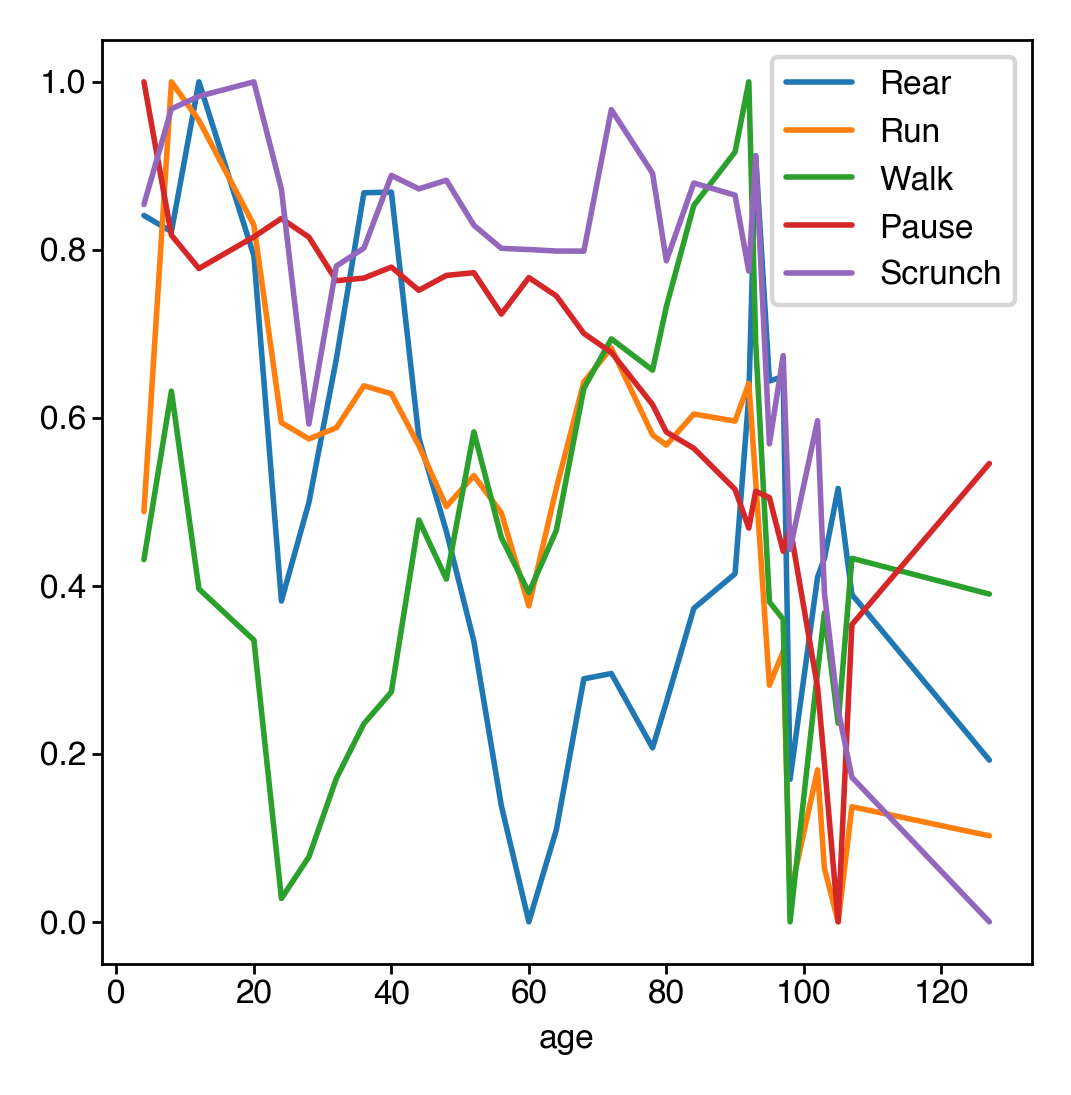

In [41]:
smooth_avg.plot()

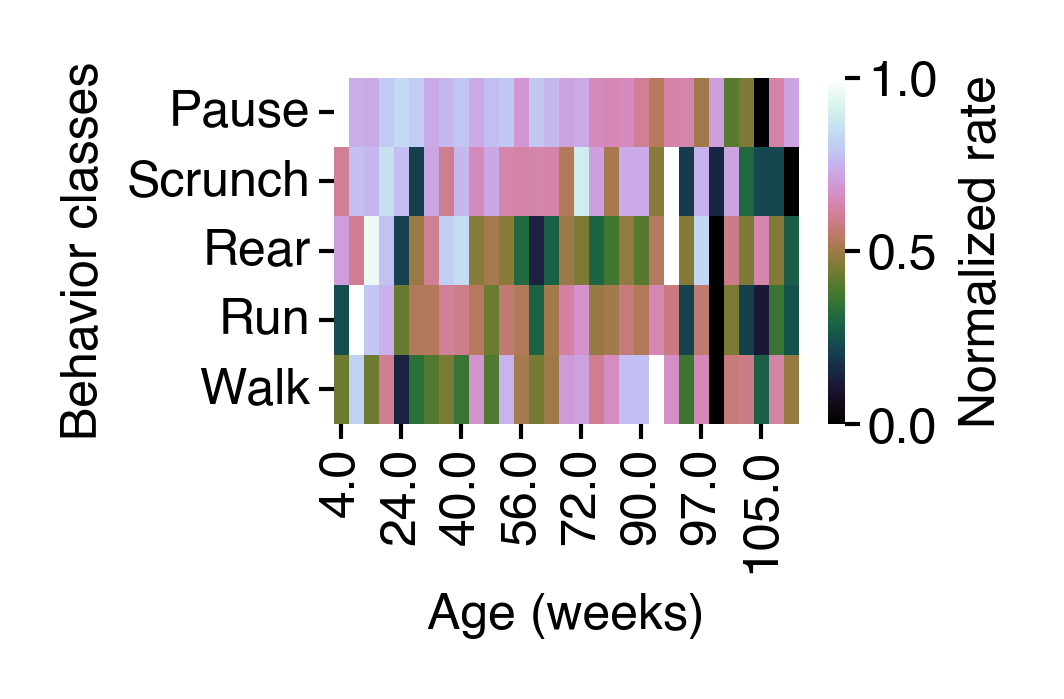

In [42]:
fig = figure(1.25, 0.75)
ax = sns.heatmap(avg[ordering].T, cmap='cubehelix', cbar_kws=dict(label="Normalized rate"))
ax.set(xlabel="Age (weeks)", ylabel="Behavior classes")
saver(fig, "model-free-behavior-rates-female");

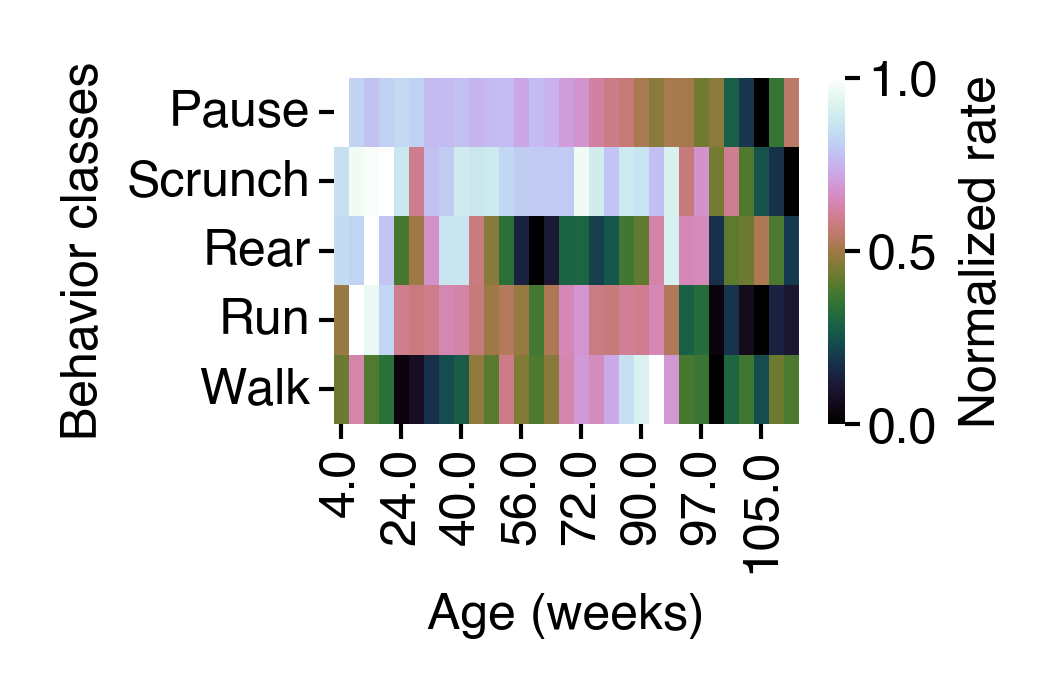

In [43]:
fig = figure(1.25, 0.75)
ax = sns.heatmap(smooth_avg[ordering].T, cmap='cubehelix', cbar_kws=dict(label="Normalized rate"))
ax.set(xlabel="Age (weeks)", ylabel="Behavior classes")
saver(fig, "smoothed-model-free-behavior-rates-female");

## Plot classes from each sex as individual graphs

In [44]:
cols = smooth_avg_male.columns

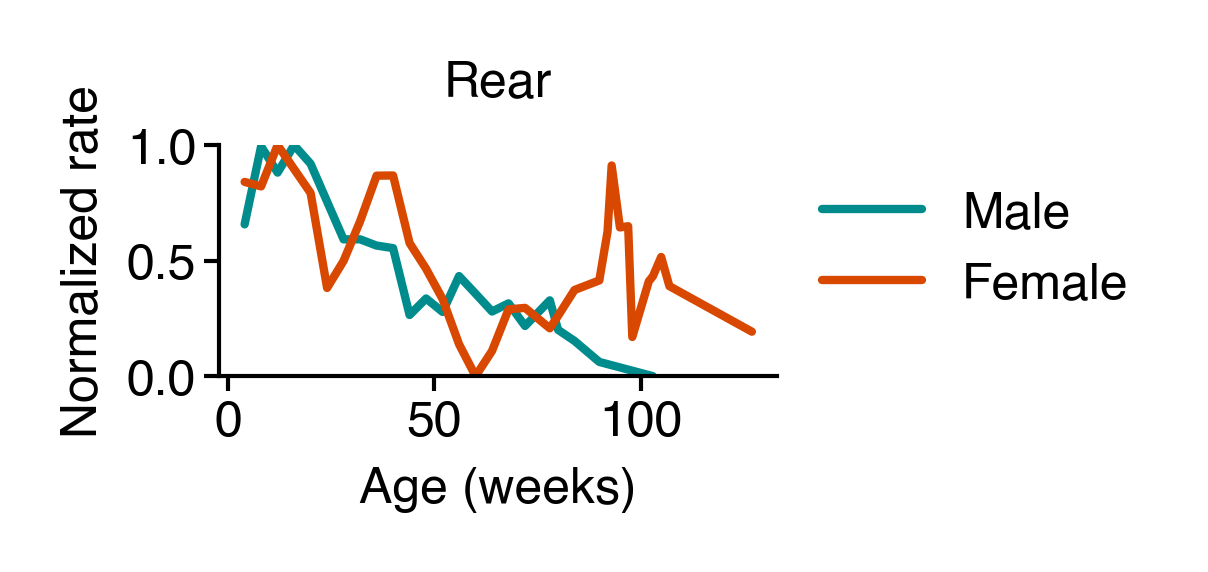

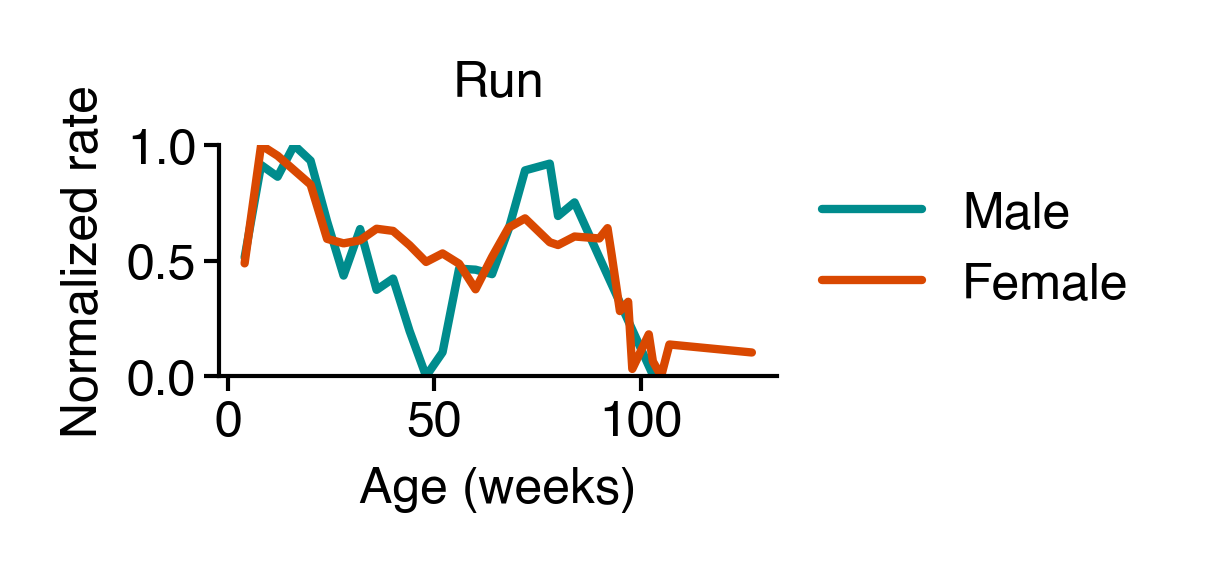

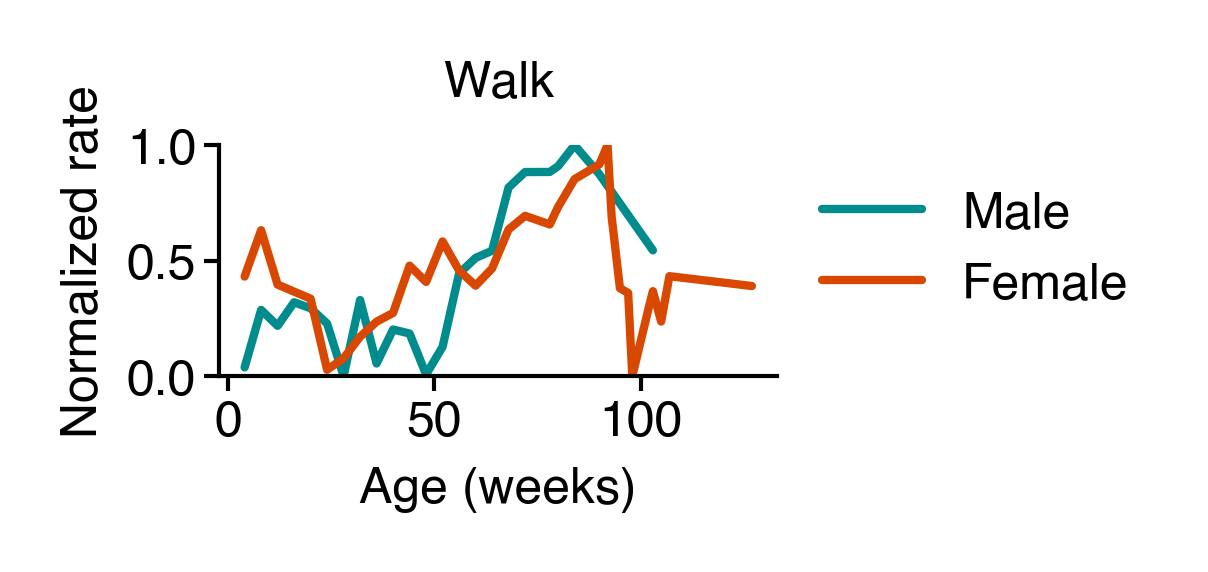

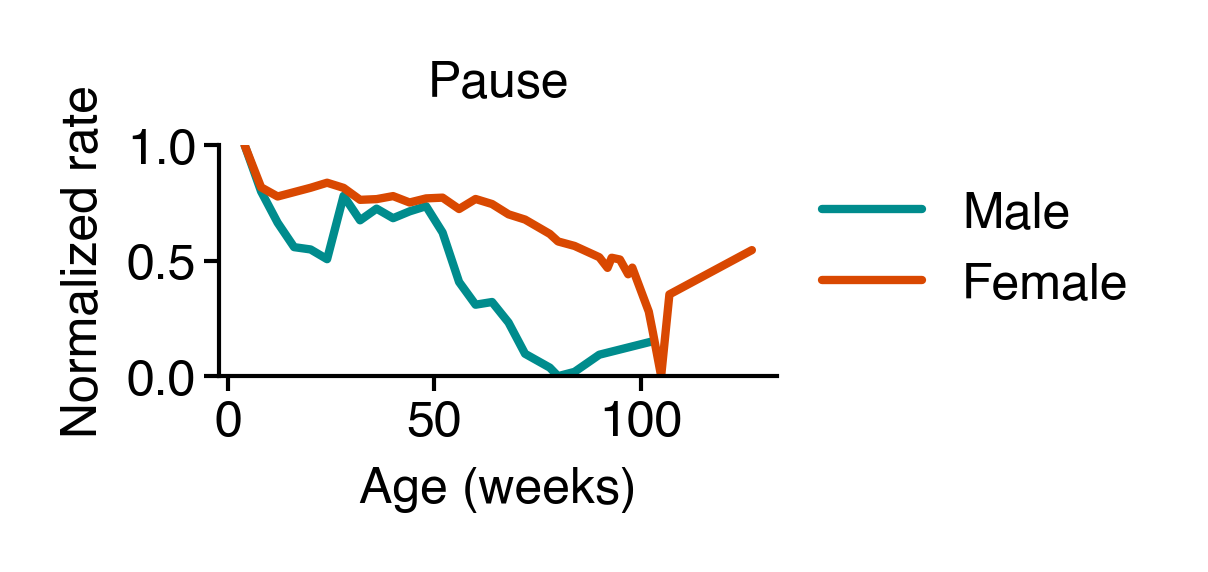

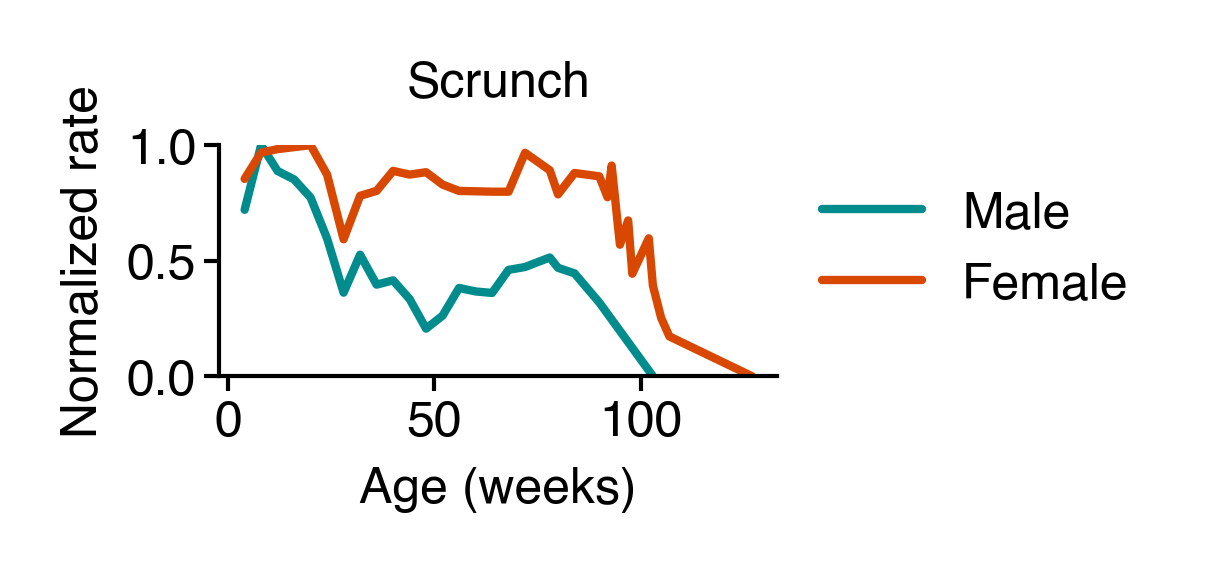

In [45]:
for col in cols:
    fig = figure(1.2, 0.5)
    ax = fig.gca()
    ax.plot(smooth_avg_male[col], color=COLORMAPS.ont_male(255), label="Male")
    ax.plot(smooth_avg_female[col], color=COLORMAPS.ont_female(255), label="Female")
    ax.set(title=col, xlabel="Age (weeks)", ylabel="Normalized rate", ylim=(0, 1))
    sns.despine()
    legend()
    saver(fig, f"male-v-female-model-free-beh-rate-{col}")